## Day 3 : Agenda

- Data Analytics (reshaping, sort)
    - .loc
    - pyspark
    - polars
- OO (dunders)
    - exception handling
- Relational DB (API 2.0)
- ORM (Object Relational Mapper)
- logging


- decorators
- generators

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [4]:
mpg.index

RangeIndex(start=0, stop=398, step=1)

In [6]:
weight_by_yr = mpg.groupby('model_year').weight.mean()
weight_by_yr

model_year
70    3372.793103
71    2995.428571
72    3237.714286
73    3419.025000
74    2877.925926
75    3176.800000
76    3078.735294
77    2997.357143
78    2861.805556
79    3055.344828
80    2436.655172
81    2522.931034
82    2453.548387
Name: weight, dtype: float64

In [7]:
weight_by_yr.index

Index([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype='int64', name='model_year')

In [8]:
weight_by_yr_orig = mpg.groupby(['model_year', 'origin']).weight.mean()
weight_by_yr_orig

model_year  origin
70          europe    2309.200000
            japan     2251.000000
            usa       3716.500000
71          europe    2024.000000
            japan     1936.000000
            usa       3401.600000
72          europe    2573.200000
            japan     2300.400000
            usa       3682.666667
73          europe    2335.714286
            japan     2397.250000
            usa       3821.448276
74          europe    2139.333333
            japan     2053.000000
            usa       3503.333333
75          europe    2571.166667
            japan     2303.250000
            usa       3533.200000
76          europe    2611.000000
            japan     2217.500000
            usa       3405.409091
77          europe    2138.750000
            japan     2295.833333
            usa       3422.000000
78          europe    2691.666667
            japan     2221.250000
            usa       3141.136364
79          europe    2693.750000
            japan     1997.50

In [9]:
type(weight_by_yr_orig)

pandas.core.series.Series

In [14]:
weight_by_yr_orig.index

MultiIndex([(70, 'europe'),
            (70,  'japan'),
            (70,    'usa'),
            (71, 'europe'),
            (71,  'japan'),
            (71,    'usa'),
            (72, 'europe'),
            (72,  'japan'),
            (72,    'usa'),
            (73, 'europe'),
            (73,  'japan'),
            (73,    'usa'),
            (74, 'europe'),
            (74,  'japan'),
            (74,    'usa'),
            (75, 'europe'),
            (75,  'japan'),
            (75,    'usa'),
            (76, 'europe'),
            (76,  'japan'),
            (76,    'usa'),
            (77, 'europe'),
            (77,  'japan'),
            (77,    'usa'),
            (78, 'europe'),
            (78,  'japan'),
            (78,    'usa'),
            (79, 'europe'),
            (79,  'japan'),
            (79,    'usa'),
            (80, 'europe'),
            (80,  'japan'),
            (80,    'usa'),
            (81, 'europe'),
            (81,  'japan'),
            (81,    

In [16]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [15]:
weight_by_yr_orig.unstack()

origin,europe,japan,usa
model_year,,,
70,2309.200000,2251.000000,3716.500000
71,2024.000000,1936.000000,3401.600000
72,2573.200000,2300.400000,3682.666667
73,2335.714286,2397.250000,3821.448276
74,2139.333333,2053.000000,3503.333333
75,2571.166667,2303.250000,3533.200000
76,2611.000000,2217.500000,3405.409091
77,2138.750000,2295.833333,3422.000000
78,2691.666667,2221.250000,3141.136364


In [21]:
mpg.pivot_table(index='model_year', 
                columns='origin', 
                values='weight', 
                aggfunc="mean")

origin,europe,japan,usa
model_year,,,
70,2309.200000,2251.000000,3716.500000
71,2024.000000,1936.000000,3401.600000
72,2573.200000,2300.400000,3682.666667
73,2335.714286,2397.250000,3821.448276
74,2139.333333,2053.000000,3503.333333
75,2571.166667,2303.250000,3533.200000
76,2611.000000,2217.500000,3405.409091
77,2138.750000,2295.833333,3422.000000
78,2691.666667,2221.250000,3141.136364


In [19]:
mpg[(mpg.origin=='japan') & (mpg.model_year==80)].weight

310    1968
312    2019
318    2711
319    2542
320    2434
321    2265
322    2110
324    2110
329    1850
331    2145
333    2910
334    2420
337    2290
Name: weight, dtype: int64

In [24]:
# max number of cylinders by model year and origin
mpg.pivot_table(index='model_year', 
                columns='origin', 
                values='cylinders', 
                aggfunc=['min', 'mean', 'max'])

min                mean                        max          
origin     europe japan usa    europe     japan       usa europe japan usa
model_year                                                                
70              4     4   6  4.000000  4.000000  7.636364      4     4   8
71              4     4   4  4.000000  4.000000  6.200000      4     4   8
72              4     3   4  4.000000  3.800000  6.888889      4     4   8
73              4     3   4  4.000000  4.250000  7.241379      4     6   8
74              4     4   4  4.000000  4.000000  6.266667      4     4   8
75              4     4   4  4.000000  4.000000  6.400000      4     4   8
76              4     4   4  4.250000  4.500000  6.363636      6     6   8
77              4     3   4  4.000000  4.166667  6.222222      4     6   8
78              4     4   4  4.833333  4.000000  6.000000      6     4   8
79              4     4   4  4.250000  4.000000  6.260870      5     4   8
80              4     3   4  4.111111  4.076923  4.285714      5     6   6
81              4     4   4  4.500000  4.333333  4.923077      6     6   8
82              4     4   4  4.000000  4.000000  4.300000      4     4   6

In [26]:
mpg.mpg.mean()

np.float64(23.514572864321607)

In [28]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<Axes: ylabel='mpg'>

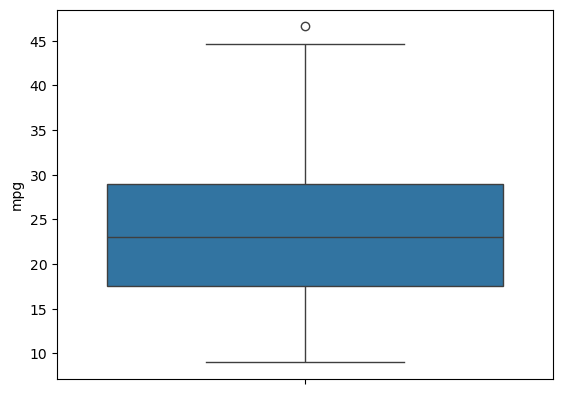

In [29]:
sns.boxplot(mpg.mpg)

In [27]:
mpg.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

<Axes: ylabel='weight'>

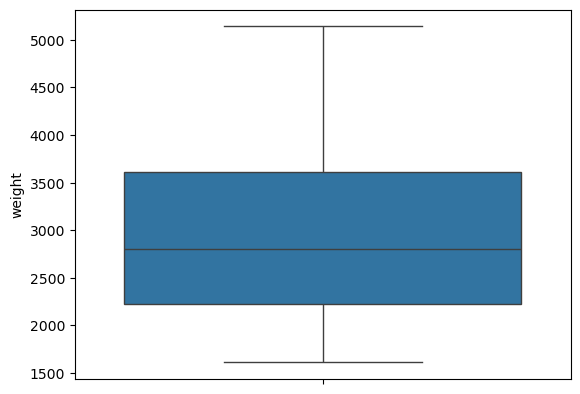

In [30]:
sns.boxplot(mpg.weight)

<Axes: >

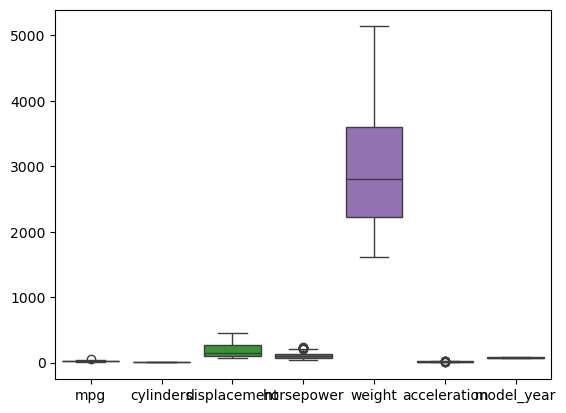

In [31]:
sns.boxplot(mpg)

<Axes: ylabel='horsepower'>

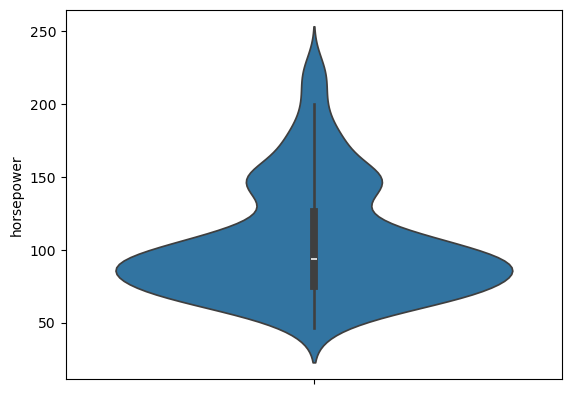

In [32]:
sns.violinplot(mpg.horsepower)

<Axes: xlabel='mpg', ylabel='weight'>

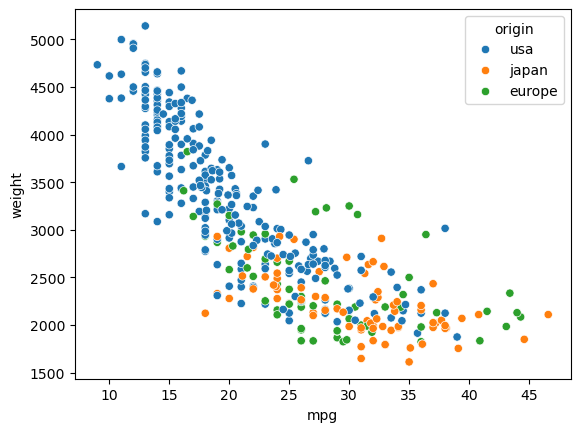

In [33]:
sns.scatterplot(data=mpg, x='mpg', y='weight', hue='origin')

## Index based lookup (locators/indexers)

In [40]:
weight_by_yr_orig.loc[75]

origin
europe    2571.166667
japan     2303.250000
usa       3533.200000
Name: weight, dtype: float64

In [41]:
weight_by_yr_orig.loc[75,'japan']

np.float64(2303.25)

In [44]:
weight_by_yr_orig.loc[71:79, 'japan']

model_year  origin
71          japan     1936.000000
72          japan     2300.400000
73          japan     2397.250000
74          japan     2053.000000
75          japan     2303.250000
76          japan     2217.500000
77          japan     2295.833333
78          japan     2221.250000
79          japan     1997.500000
Name: weight, dtype: float64

In [47]:
mpgi = mpg.set_index(['model_year', 'origin'])
mpgi

mpg  cylinders  displacement  horsepower  weight  \
model_year origin                                                      
70         usa     18.0          8         307.0       130.0    3504   
           usa     15.0          8         350.0       165.0    3693   
           usa     18.0          8         318.0       150.0    3436   
           usa     16.0          8         304.0       150.0    3433   
           usa     17.0          8         302.0       140.0    3449   
...                 ...        ...           ...         ...     ...   
82         usa     27.0          4         140.0        86.0    2790   
           europe  44.0          4          97.0        52.0    2130   
           usa     32.0          4         135.0        84.0    2295   
           usa     28.0          4         120.0        79.0    2625   
           usa     31.0          4         119.0        82.0    2720   

                   acceleration                       name  
model_year origin                                           
70         usa             12.0  chevrolet chevelle malibu  
           usa             11.5          buick skylark 320  
           usa             11.0         plymouth satellite  
           usa             12.0              amc rebel sst  
           usa             10.5                ford torino  
...                         ...                        ...  
82         usa             15.6            ford mustang gl  
           europe          24.6                  vw pickup  
           usa             11.6              dodge rampage  
           usa             18.6                ford ranger  
           usa             19.4                 chevy s-10  

[398 rows x 7 columns]

In [51]:
mpgi.index

MultiIndex([(70,    'usa'),
            (70,    'usa'),
            (70,    'usa'),
            (70,    'usa'),
            (70,    'usa'),
            (70,    'usa'),
            (70,    'usa'),
            (70,    'usa'),
            (70,    'usa'),
            (70,    'usa'),
            ...
            (82,    'usa'),
            (82,    'usa'),
            (82,  'japan'),
            (82,    'usa'),
            (82,    'usa'),
            (82,    'usa'),
            (82, 'europe'),
            (82,    'usa'),
            (82,    'usa'),
            (82,    'usa')],
           names=['model_year', 'origin'], length=398)

In [57]:
mpgi.sort_index(inplace=True)

In [54]:
slice(71, 79)

slice(71, 79, None)

In [87]:
%%timeit
mpgi.loc[(slice(71,79),'japan'), :]

85.9 μs ± 588 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [88]:
%%timeit
mpg[mpg.model_year.between(71,79) & (mpg.origin == 'japan')]

130 μs ± 1.2 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Object Orientation

```c#
class Stack {
    List data;
    Stack () {
        data = List()
    }
    
    Stack (Stack other) {
        data = other.data
    }
    
    push (val) {
        data.append(val)
    }
    
    pop () {
        val = data.pop()
        return val
    }
    ~Stack () {}
}
```

In [102]:
num = 10
num = 'hello'

print(num)

hello


In [103]:
def square(num):
    return num**2

def square(num):
    return num*2

square(100)

200

In [97]:
class Stack:
    registry = {}    # Static data member: one per class
    
    def __init__(self, initdata=[]):
        self.data = initdata    # instance data: one per object
        
    @staticmethod
    def from_stack(other):
        s = Stack()
        s.data = other.data
        return s
        
    def push(self, val):
        self.data.append(val)
        
    def pop(self):
        if not self.is_empty():
            val = self.data.pop()
            return val
    
    def is_empty(self):
        return len(self.data) == 0
    
    def copy(self):
        return Stack(self.data)

In [ ]:
Stack.from_stack(s2)

In [ ]:
Stack.data

In [93]:
s1 = Stack()
s2 = Stack()

In [ ]:
s2.copy()

In [94]:
s1.push('hello')
s1.push('world')
s1.push('bye')
s2.push(s1.pop())

In [95]:
s1.data

['hello', 'world']

In [96]:
s2.data

['bye']

### Exercise

Write an `BankAccount` class

#### Data
- name
- balance

#### Operations
- check balance
- withdraw
- deposit

In [112]:
class BankAccount:
    def __init__(self, name, balance):
        self.name = name
        self._balance = balance
        
    def deposit(self, amt):
        self._balance += amt
        
    def withdraw(self, amt):
        self._balance -= amt
        
    def check_balance(self):
        return self._balance
    
    def __str__(self):
        return f'BankAccount({self.name})'
    
    def __repr__(self):
        return self.__str__()

In [113]:
myacc = BankAccount('ash', 0)
bgacc = BankAccount('BG', 123456789)

In [101]:
bgacc.withdraw(10000)
myacc.deposit(10000)

In [104]:
class WealthAccount(BankAccount, ):
    ...

In [116]:
print(myacc)
# myacc

BankAccount(ash)


## DB API

In [117]:
import sqlite3

In [ ]:
create_table_query = '''
CREATE TABLE IF NOT EXISTS TIPS (
    total_bill FLOAT,tip FLOAT,sex STRING,smoker STRING,
    day STRING,time STRING,size INT
)
'''

### IMPORT DATA INTO SQLITE

1. Open `sqlite3` command line
2. `.open test.db`
3. CREATE TABLE .. SQL
4. `.mode csv`
5. .import data/tips.csv TIPS
6. SELECT COUNT(*) FROM TIPS;

In [118]:
conn = sqlite3.connect('test.db')
conn

In [119]:
cur = conn.cursor()
cur

In [120]:
# Total tip paid by Females
query = '''
SELECT SUM(TIP) FROM TIPS 
WHERE SEX = 'Female';
'''

In [121]:
cur.execute(query)

In [122]:
cur.fetchone()

(246.51,)

In [123]:
query = 'select * from tips;'

In [124]:
cur.execute(query)

In [131]:
cur.fetchone()

(25.29, 4.71, 'Male', 'No', 'Sun', 'Dinner', 4)

In [132]:
cur.fetchmany(10)

[(8.77, 2.0, 'Male', 'No', 'Sun', 'Dinner', 2),
 (26.88, 3.12, 'Male', 'No', 'Sun', 'Dinner', 4),
 (15.04, 1.96, 'Male', 'No', 'Sun', 'Dinner', 2),
 (14.78, 3.23, 'Male', 'No', 'Sun', 'Dinner', 2),
 (10.27, 1.71, 'Male', 'No', 'Sun', 'Dinner', 2),
 (35.26, 5.0, 'Female', 'No', 'Sun', 'Dinner', 4),
 (15.42, 1.57, 'Male', 'No', 'Sun', 'Dinner', 2),
 (18.43, 3.0, 'Male', 'No', 'Sun', 'Dinner', 4),
 (14.83, 3.02, 'Female', 'No', 'Sun', 'Dinner', 2),
 (21.58, 3.92, 'Male', 'No', 'Sun', 'Dinner', 2)]

In [133]:
cur.fetchall()

[(10.33, 1.67, 'Female', 'No', 'Sun', 'Dinner', 3),
 (16.29, 3.71, 'Male', 'No', 'Sun', 'Dinner', 3),
 (16.97, 3.5, 'Female', 'No', 'Sun', 'Dinner', 3),
 (20.65, 3.35, 'Male', 'No', 'Sat', 'Dinner', 3),
 (17.92, 4.08, 'Male', 'No', 'Sat', 'Dinner', 2),
 (20.29, 2.75, 'Female', 'No', 'Sat', 'Dinner', 2),
 (15.77, 2.23, 'Female', 'No', 'Sat', 'Dinner', 2),
 (39.42, 7.58, 'Male', 'No', 'Sat', 'Dinner', 4),
 (19.82, 3.18, 'Male', 'No', 'Sat', 'Dinner', 2),
 (17.81, 2.34, 'Male', 'No', 'Sat', 'Dinner', 4),
 (13.37, 2.0, 'Male', 'No', 'Sat', 'Dinner', 2),
 (12.69, 2.0, 'Male', 'No', 'Sat', 'Dinner', 2),
 (21.7, 4.3, 'Male', 'No', 'Sat', 'Dinner', 2),
 (19.65, 3.0, 'Female', 'No', 'Sat', 'Dinner', 2),
 (9.55, 1.45, 'Male', 'No', 'Sat', 'Dinner', 2),
 (18.35, 2.5, 'Male', 'No', 'Sat', 'Dinner', 4),
 (15.06, 3.0, 'Female', 'No', 'Sat', 'Dinner', 2),
 (20.69, 2.45, 'Female', 'No', 'Sat', 'Dinner', 4),
 (17.78, 3.27, 'Male', 'No', 'Sat', 'Dinner', 2),
 (24.06, 3.6, 'Male', 'No', 'Sat', 'Dinner', 

In [134]:
cur.fetchone()

In [135]:
cur.fetchall()

[]

In [137]:
import pymssql

### Type annotation

In [ ]:
pd.read_csv()

In [145]:
from typing import List, Dict, Optional

In [144]:
i = 10
i: int = 10
    
def square(num: int) -> int: 
    return num**2

## ORM

- Class definition -> SQL generation -> SQL execution

In [160]:
import sqlalchemy

from sqlalchemy.orm import DeclarativeBase, Mapped, mapped_column, relationship
from sqlalchemy import String
from sqlalchemy.orm import Session

from sqlalchemy import create_engine

In [148]:
from typing import Optional

In [141]:
class Base(DeclarativeBase):
    pass

In [151]:
class Emp(Base):
    __tablename__ = 'employee'
    
    id: Mapped[int]     = mapped_column(primary_key=True)
    name: Mapped[str]   = mapped_column(String(50))
    mailid: Mapped[str] = mapped_column(String(30))
    salary: Mapped[float]


/var/folders/s8/kjxth_ks4bl65mbw_b3_hhzc0000gn/T/ipykernel_16757/2194153949.py:1: SAWarning: This declarative base already contains a class with the same class name and module name as __main__.Emp, and will be replaced in the string-lookup table.
  class Emp(Base):


In [154]:
engine = create_engine('sqlite://', echo=True)
engine

Engine(sqlite://)

In [155]:
Base.metadata.create_all(engine)

2025-11-09 19:18:09,992 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-11-09 19:18:10,002 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("employee")
2025-11-09 19:18:10,003 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-11-09 19:18:10,006 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("employee")
2025-11-09 19:18:10,007 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-11-09 19:18:10,010 INFO sqlalchemy.engine.Engine 
CREATE TABLE employee (
	id INTEGER NOT NULL, 
	name VARCHAR(50) NOT NULL, 
	mailid VARCHAR(30) NOT NULL, 
	salary FLOAT NOT NULL, 
	PRIMARY KEY (id)
)


2025-11-09 19:18:10,011 INFO sqlalchemy.engine.Engine [no key 0.00101s] ()
2025-11-09 19:18:10,014 INFO sqlalchemy.engine.Engine COMMIT


In [157]:
emp1 = Emp(id=1, name='abc', mailid='a@b.com', salary=123.45)
emp1

In [159]:
emp1.name

'abc'

In [162]:
with Session(engine) as session:
    session.add(emp1)
    
    session.commit()

2025-11-09 19:29:48,895 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-11-09 19:29:48,904 INFO sqlalchemy.engine.Engine INSERT INTO employee (id, name, mailid, salary) VALUES (?, ?, ?, ?)
2025-11-09 19:29:48,904 INFO sqlalchemy.engine.Engine [generated in 0.00116s] (1, 'abc', 'a@b.com', 123.45)
2025-11-09 19:29:48,907 INFO sqlalchemy.engine.Engine COMMIT


In [163]:
from sqlalchemy import select

In [165]:
stmt = select(Emp).where(Emp.name == 'abc')
stmt

In [166]:
with Session(engine) as session:
    result = session.scalars(stmt)
    
    print(result)

2025-11-09 19:36:49,356 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-11-09 19:36:49,390 INFO sqlalchemy.engine.Engine SELECT employee.id, employee.name, employee.mailid, employee.salary 
FROM employee 
WHERE employee.name = ?
2025-11-09 19:36:49,391 INFO sqlalchemy.engine.Engine [generated in 0.00121s] ('abc',)
2025-11-09 19:36:49,395 INFO sqlalchemy.engine.Engine ROLLBACK


In [168]:
2**38

274877906944

In [169]:
crypt = '''g fmnc wms bgblr rpylqjyrc gr zw fylb. rfyrq ufyr amknsrcpq ypc dmp. bmgle gr gl zw fylb gq glcddgagclr ylb rfyr'q ufw rfgq rcvr gq qm jmle. sqgle qrpgle.kyicrpylq() gq pcamkkclbcb. lmu ynnjw ml rfc spj.'''

In [172]:
chr(ord('A')+2)

'C'

In [174]:
for char in crypt:
    print(chr(ord(char)+2), end='')

i"hope"you"didnt"tr{nsl{te"it"|y"h{nd0"th{ts"wh{t"computers"{re"for0"doing"it"in"|y"h{nd"is"inefficient"{nd"th{t)s"why"this"text"is"so"long0"using"string0m{ketr{ns*+"is"recommended0"now"{pply"on"the"url0

In [175]:
for char in 'map':
    print(chr(ord(char)+2), end='')

ocr